In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

In [3]:
data = np.load("/Users/sakaikeiichirou/CellTK/output/20201217-PKAKTR-mating/df.npz",allow_pickle=True)

arr = data['arr']
labels = data['labels']
time = data['time']
labels

array([['cyto', 'RFP', 'area'],
       ['cyto', 'RFP', 'cell_id'],
       ['cyto', 'RFP', 'convex_area'],
       ['cyto', 'RFP', 'cv_intensity'],
       ['cyto', 'RFP', 'eccentricity'],
       ['cyto', 'RFP', 'major_axis_length'],
       ['cyto', 'RFP', 'max_intensity'],
       ['cyto', 'RFP', 'mean_intensity'],
       ['cyto', 'RFP', 'median_intensity'],
       ['cyto', 'RFP', 'min_intensity'],
       ['cyto', 'RFP', 'minor_axis_length'],
       ['cyto', 'RFP', 'num_seg'],
       ['cyto', 'RFP', 'orientation'],
       ['cyto', 'RFP', 'parent'],
       ['cyto', 'RFP', 'perimeter'],
       ['cyto', 'RFP', 'solidity'],
       ['cyto', 'RFP', 'std_intensity'],
       ['cyto', 'RFP', 'total_intensity'],
       ['cyto', 'RFP', 'x'],
       ['cyto', 'RFP', 'y'],
       ['nuc', 'RFP', 'area'],
       ['nuc', 'RFP', 'cell_id'],
       ['nuc', 'RFP', 'convex_area'],
       ['nuc', 'RFP', 'cv_intensity'],
       ['nuc', 'RFP', 'eccentricity'],
       ['nuc', 'RFP', 'major_axis_length'],
       [

In [17]:
cell = range(103)# 0-10 細胞
label1 = np.all((labels == 'cyto') | (labels == 'RFP') | (labels == 'mean_intensity'), axis=1)
label2 = np.all((labels == 'nuc') | (labels == 'RFP') | (labels == 'mean_intensity'), axis=1)
label3 = np.all((labels == 'cyto') | (labels == 'RFP') | (labels == 'cell_id'), axis=1)
label4 = np.all((labels == 'nuc') | (labels == 'RFP') | (labels == 'area'), axis=1)
label5 = np.all((labels == 'nuc') | (labels == 'RFP') | (labels == 'total_intensity'), axis=1)

In [18]:
df = pd.DataFrame()
for i in cell:
    tmp_nuc = arr[label2,cell,:][i,:]
    tmp_cyto = arr[label1,cell,:][i,:]
    tmp_cell_id = arr[label3,cell,:][i,:]
    tmp_area = arr[label4,cell,:][i,:]
    tmp_total_intensity = arr[label5,cell,:][i,:]
    tmp = pd.DataFrame([tmp_nuc,tmp_cyto,tmp_cell_id,tmp_area,tmp_total_intensity],index=["nuc","cyto","cell_id_CellTK","nuc_area","nuc_intensity"]).T
    tmp["c/n"] = tmp_cyto/tmp_nuc
    tmp["cell_id"] = np.full(49,i)
    tmp["time"] = np.arange(49)
    df = pd.concat([df,tmp])
display(df)

df_2 = df.reset_index(drop=True)
df_2["sav"] = savgol_filter(df_2["nuc_area"],5,2)
display(df_2)

nuc        cyto  cell_id_CellTK  nuc_area  nuc_intensity       c/n  \
0   631.379395  652.070496             1.0      98.0   61875.179688  1.032771   
1   610.097473  651.362244             1.0      98.0   59789.554688  1.067636   
2   670.208740  611.098999             1.0      99.0   66350.664062  0.911804   
3   625.002075  586.168396             1.0      99.0   61875.203125  0.937866   
4   614.701599  595.280884             1.0      96.0   59011.351562  0.968406   
..         ...         ...             ...       ...            ...       ...   
44  803.187744  528.949463           113.0      44.0   35340.261719  0.658563   
45  794.455017  650.435425           113.0      57.0   45283.937500  0.818719   
46  780.113647  579.592834           113.0      54.0   42126.136719  0.742959   
47  760.558350  640.652222           113.0      57.0   43351.824219  0.842345   
48  732.805237  605.260620           113.0      60.0   43968.312500  0.825950   

    cell_id  time  
0         0     0  
1         0     1  
2         0     2  
3         0     3  
4         0     4  
..      ...   ...  
44      102    44  
45      102    45  
46      102    46  
47      102    47  
48      102    48  

[5047 rows x 8 columns]

nuc        cyto  cell_id_CellTK  nuc_area  nuc_intensity  \
0     631.379395  652.070496             1.0      98.0   61875.179688   
1     610.097473  651.362244             1.0      98.0   59789.554688   
2     670.208740  611.098999             1.0      99.0   66350.664062   
3     625.002075  586.168396             1.0      99.0   61875.203125   
4     614.701599  595.280884             1.0      96.0   59011.351562   
...          ...         ...             ...       ...            ...   
5042  803.187744  528.949463           113.0      44.0   35340.261719   
5043  794.455017  650.435425           113.0      57.0   45283.937500   
5044  780.113647  579.592834           113.0      54.0   42126.136719   
5045  760.558350  640.652222           113.0      57.0   43351.824219   
5046  732.805237  605.260620           113.0      60.0   43968.312500   

           c/n  cell_id  time        sav  
0     1.032771        0     0  97.600000  
1     1.067636        0     1  98.800000  
2     0.911804        0     2  99.000000  
3     0.937866        0     3  97.971429  
4     0.968406        0     4  97.628571  
...        ...      ...   ...        ...  
5042  0.658563      102    44        NaN  
5043  0.818719      102    45  52.885714  
5044  0.742959      102    46  56.400000  
5045  0.842345      102    47  58.600000  
5046  0.825950      102    48  58.800000  

[5047 rows x 9 columns]

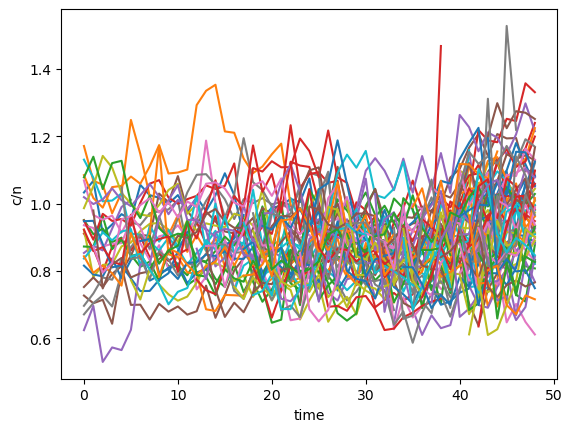

In [20]:
for i in df_2['cell_id'].unique():
    sns.lineplot(data=df_2[df_2['cell_id']==i], x="time", y="c/n")

In [47]:
#NaNのカウント
lists = []
for i in range(49):
    df_tmp = df_2[df_2["time"]==i]
    NaN_count = df_tmp["c/n"].isnull().sum()
    lists.append(NaN_count)
max(lists)


78

(0.4, 1.2)

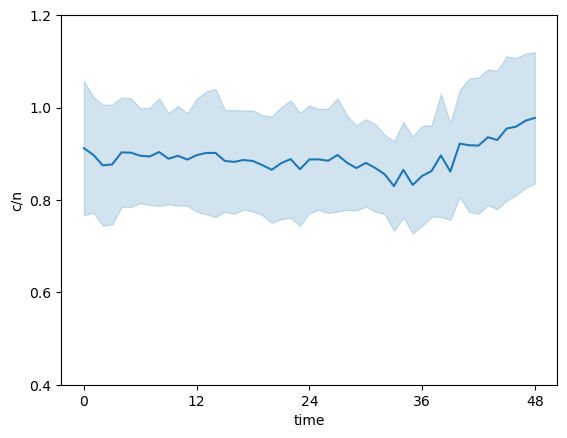

In [31]:
sns.lineplot(data=df_2, x="time", y="c/n", errorbar='sd' )
plt.xticks([0,12,24,36,48])
plt.yticks([0.4,0.6,0.8,1.0,1.2])
plt.ylim(0.4,1.2)

In [37]:
#NaNを除く
df_dropna = pd.DataFrame()
for i in cell:
    df_tmp = df_2[df_2["cell_id"]==i]
    if df_tmp["c/n"].isnull().sum() == 0: #NaNを含むデータの削除
        df_dropna = pd.concat([df_dropna,df_tmp])

display(df_dropna)
df_dropna['cell_id'].nunique()
df_dropna_2 = df_dropna.reset_index(drop=True)
display(df_dropna_2)
df_dropna_2['cell_id'].nunique()

nuc        cyto  cell_id_CellTK  nuc_area  nuc_intensity  \
245   778.302612  565.512756             7.0      68.0   52924.578125   
246   890.961548  627.026733             7.0      69.0   61476.347656   
247   931.428467  665.144043             7.0      72.0   67062.851562   
248   940.747498  604.788391             7.0      66.0   62089.335938   
249   846.890015  675.476746             7.0      78.0   66057.421875   
...          ...         ...             ...       ...            ...   
1220  764.211487  632.399658            26.0      75.0   57315.863281   
1221  763.351135  612.782715            26.0      76.0   58014.687500   
1222  739.729065  600.724548            26.0      79.0   58438.597656   
1223  712.811890  634.782104            26.0      72.0   51322.457031   
1224  662.110840  612.549438            26.0      82.0   54293.089844   

           c/n  cell_id  time        sav  
245   0.726598        5     0        NaN  
246   0.703764        5     1        NaN  
247   0.714112        5     2  68.742857  
248   0.642881        5     3  70.885714  
249   0.797597        5     4  74.057143  
...        ...      ...   ...        ...  
1220  0.827519       24    44  74.400000  
1221  0.802753       24    45  77.457143  
1222  0.812087       24    46  75.657143  
1223  0.890532       24    47        NaN  
1224  0.925146       24    48        NaN  

[392 rows x 9 columns]

nuc        cyto  cell_id_CellTK  nuc_area  nuc_intensity  \
0    778.302612  565.512756             7.0      68.0   52924.578125   
1    890.961548  627.026733             7.0      69.0   61476.347656   
2    931.428467  665.144043             7.0      72.0   67062.851562   
3    940.747498  604.788391             7.0      66.0   62089.335938   
4    846.890015  675.476746             7.0      78.0   66057.421875   
..          ...         ...             ...       ...            ...   
387  764.211487  632.399658            26.0      75.0   57315.863281   
388  763.351135  612.782715            26.0      76.0   58014.687500   
389  739.729065  600.724548            26.0      79.0   58438.597656   
390  712.811890  634.782104            26.0      72.0   51322.457031   
391  662.110840  612.549438            26.0      82.0   54293.089844   

          c/n  cell_id  time        sav  
0    0.726598        5     0        NaN  
1    0.703764        5     1        NaN  
2    0.714112        5     2  68.742857  
3    0.642881        5     3  70.885714  
4    0.797597        5     4  74.057143  
..        ...      ...   ...        ...  
387  0.827519       24    44  74.400000  
388  0.802753       24    45  77.457143  
389  0.812087       24    46  75.657143  
390  0.890532       24    47        NaN  
391  0.925146       24    48        NaN  

[392 rows x 9 columns]

8

0         1         2         3         4         5         6  \
0    0.949597  0.892541  0.969320  0.948296  0.954160  0.934641  1.001853   
1    1.018857  0.998410  1.011859  1.044959  1.009956  0.992243  1.024513   
2    0.726598  0.703764  0.714112  0.642881  0.797597  0.845219  0.906810   
3    0.922765  0.781348  0.817657  0.820006  0.872587  0.884103  0.917995   
4    1.032771  1.067636  0.911804  0.937866  0.968406  0.952117  1.055387   
..        ...       ...       ...       ...       ...       ...       ...   
98        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
100       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
101       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
102       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            7         8         9  ...        40        41        42  \
0    1.059008  1.069426  1.017764  ...  0.959127  1.038254  1.218195   
1    1.058028  1.019956  0.968173  ...  1.263065  1.226765  1.155211   
2    0.903888  1.029487  1.003702  ...  1.102932  1.165754  1.206428   
3    0.939567  0.942608  0.922485  ...  0.817053  0.994573  1.043170   
4    1.024936  1.016990  0.999471  ...  0.957918  0.833480       NaN   
..        ...       ...       ...  ...       ...       ...       ...   
98        NaN       NaN       NaN  ...       NaN       NaN       NaN   
99        NaN       NaN       NaN  ...       NaN       NaN       NaN   
100       NaN       NaN       NaN  ...       NaN       NaN       NaN   
101       NaN       NaN       NaN  ...       NaN       NaN       NaN   
102       NaN       NaN       NaN  ...       NaN       NaN       NaN   

           43        44        45        46        47        48        sum  
0    1.187555  1.181965  1.251580  1.245025  1.357071  1.330591  50.437228  
1    1.211423  1.195607  1.145404  1.205466  1.297535  1.214744  50.393267  
2    1.141587  1.206251  1.193377  1.194637  1.095980  1.097980  46.666868  
3    1.117318  1.122524  1.059465  0.974191  1.006437  1.043743  45.110730  
4         NaN       NaN  1.094948  0.921935  1.062213  1.080750  44.544500  
..        ...       ...       ...       ...       ...       ...        ...  
98   1.193810  0.794049  0.834925  0.798205  0.801760  0.748455   5.171204  
99        NaN       NaN       NaN       NaN       NaN       NaN   5.091612  
100       NaN       NaN       NaN       NaN       NaN       NaN   4.797146  
101  0.905515  0.658563  0.818719  0.742959  0.842345  0.825950   4.794050  
102  0.801815  0.815597  0.698161  0.671207  0.727087  0.715472   4.429339  

[103 rows x 50 columns]

<Axes: >

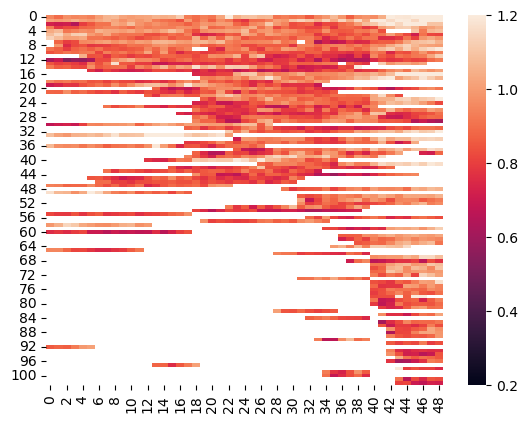

In [32]:
df_heat =  pd.DataFrame()
for i in df_2["cell_id"].unique():
    df_tmp =  df_2["c/n"][df_2["cell_id"]==i].reset_index(drop=True)
    df_heat = pd.concat([df_heat,df_tmp],axis=1)
df_T = df_heat.T
#display(df_T)

heat_sort = df_T
heat_sort["sum"] = df_T.sum(axis=1)
heat_sort = heat_sort.sort_values("sum",ascending=False).reset_index(drop=True)
display(heat_sort)

sns.heatmap(heat_sort.iloc[:,:-1],vmax=1.2,vmin=0.2)
#plt.savefig("20231017-PKAKTR-SK186-2.pdf")

0         1         2         3         4         5         6  \
0  0.949597  0.892541  0.969320  0.948296  0.954160  0.934641  1.001853   
1  1.018857  0.998410  1.011859  1.044959  1.009956  0.992243  1.024513   
2  0.726598  0.703764  0.714112  0.642881  0.797597  0.845219  0.906810   
3  0.922765  0.781348  0.817657  0.820006  0.872587  0.884103  0.917995   
4  1.077662  1.138995  1.042852  1.120010  1.126836  1.000584  0.956947   
5  1.130260  1.076677  1.006540  1.008871  1.029734  0.910807  0.907097   
6  0.836502  0.871300  0.914461  0.890506  0.916582  0.924223  0.813281   
7  0.623727  0.695840  0.529479  0.572524  0.564623  0.624924  0.819714   

          7         8         9  ...        40        41        42        43  \
0  1.059008  1.069426  1.017764  ...  0.959127  1.038254  1.218195  1.187555   
1  1.058028  1.019956  0.968173  ...  1.263065  1.226765  1.155211  1.211423   
2  0.903888  1.029487  1.003702  ...  1.102932  1.165754  1.206428  1.141587   
3  0.939567  0.942608  0.922485  ...  0.817053  0.994573  1.043170  1.117318   
4  1.022942  0.927019  0.899393  ...  0.899262  0.909205  1.009297  0.906015   
5  0.886559  0.860312  0.898637  ...  0.904958  0.751175  0.756242  0.786730   
6  0.933831  0.886805  0.921183  ...  0.922378  0.891434  0.746491  0.842014   
7  0.817189  0.959135  1.009863  ...  0.746295  0.810380  0.771778  0.786081   

         44        45        46        47        48        sum  
0  1.181965  1.251580  1.245025  1.357071  1.330591  50.437228  
1  1.195607  1.145404  1.205466  1.297535  1.214744  50.393267  
2  1.206251  1.193377  1.194637  1.095980  1.097980  46.666868  
3  1.122524  1.059465  0.974191  1.006437  1.043743  45.110730  
4  0.817220  0.712576  0.902584  0.813840  0.807195  44.254944  
5  0.907457  0.804729  0.984117  1.026825  0.979290  44.145890  
6  0.825187  0.912558  0.982578  0.897389  0.934093  42.164062  
7  0.827519  0.802753  0.812087  0.890532  0.925146  38.513013  

[8 rows x 50 columns]

<Axes: >

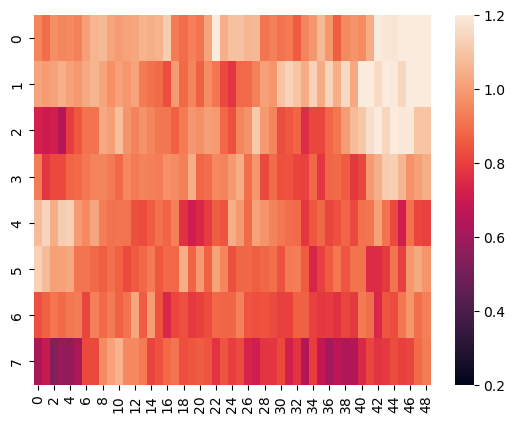

In [38]:
df_heat =  pd.DataFrame()
for i in df_dropna_2["cell_id"].unique():
    df_tmp =  df_dropna_2["c/n"][df_dropna_2["cell_id"]==i].reset_index(drop=True)
    df_heat = pd.concat([df_heat,df_tmp],axis=1)
df_T = df_heat.T
#display(df_T)

heat_sort = df_T
heat_sort["sum"] = df_T.sum(axis=1)
heat_sort = heat_sort.sort_values("sum",ascending=False).reset_index(drop=True)
display(heat_sort)

sns.heatmap(heat_sort.iloc[:,:-1],vmax=1.2,vmin=0.2)

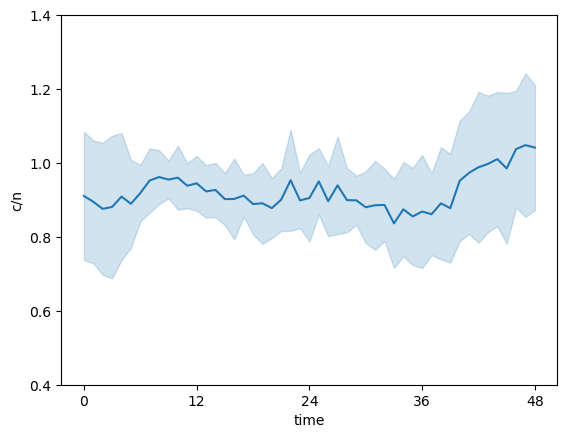

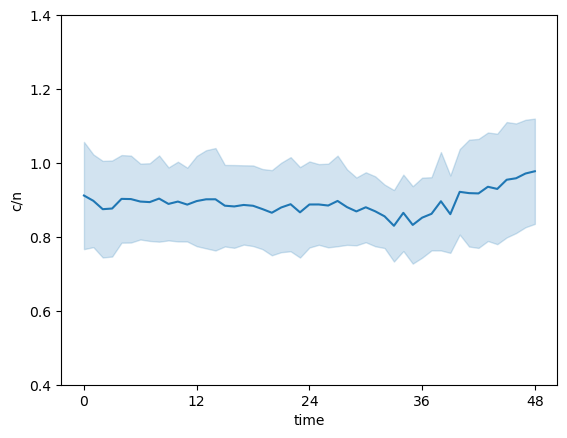

In [46]:
sns.lineplot(data=df_dropna_2, x="time", y="c/n", errorbar='sd' )
plt.xticks([0,12,24,36,48])
plt.yticks([0.4,0.6,0.8,1.0,1.2,1.4])
plt.ylim(0.4,1.4)
plt.savefig("20201217-PKAKTR-mating-no-nan.pdf")
plt.show()

sns.lineplot(data=df_2, x="time", y="c/n", errorbar='sd' )
plt.xticks([0,12,24,36,48])
plt.yticks([0.4,0.6,0.8,1.0,1.2,1.4])
plt.ylim(0.4,1.4)
plt.savefig("20201217-PKAKTR-mating.pdf")